In [12]:
import numpy as np
import cupy as cp
import time
import pandas as pd
import matplotlib.pyplot as plt

# Функция для сложения элементов вектора на CPU
def vecsum_cpu(vec):
    cpu_sum = 0
    for i in vec: 
        cpu_sum += i
    return cpu_sum

# Функция для сложения элементов вектора на GPU
def vecsum_on_gpu(vec):
  # Копия вектора на GPU
  vec_gpu = cp.asarray(vec)
  sum_gpu = cp.sum(vec_gpu)
  sum_cpu = cp.asnumpy(sum_gpu) # Возвращаем результат на CPU
  return sum_cpu

Результаты в зависимости от размера вектора:
    Размер  Время на CPU  Время на GPU  Ускорение
0     1000      0.000100      0.000199   0.500239
1     5000      0.000399      0.000399   1.000060
2    10000      0.000997      0.000399   2.499701
3    50000      0.004388      0.000898   4.886859
4   100000      0.013163      0.000899  14.634523
5   500000      0.063728      0.002495  25.545496
6  1000000      0.121580      0.004388  27.706382


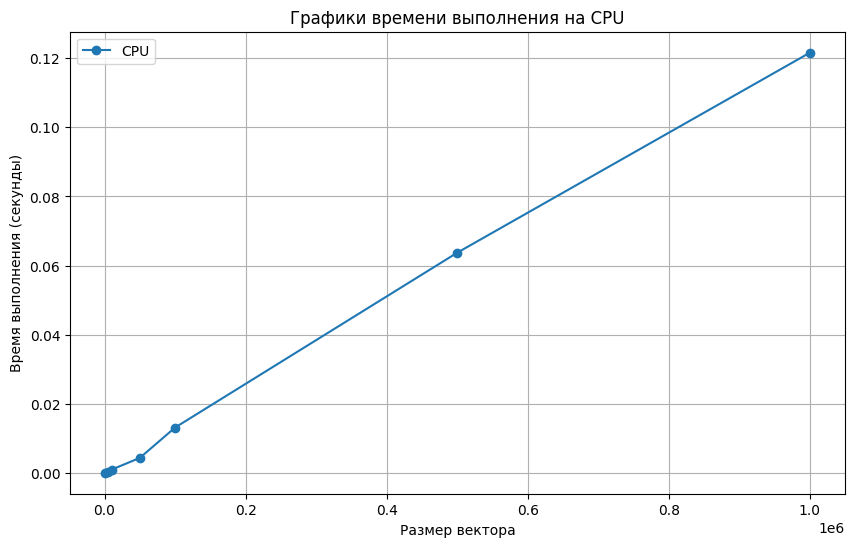

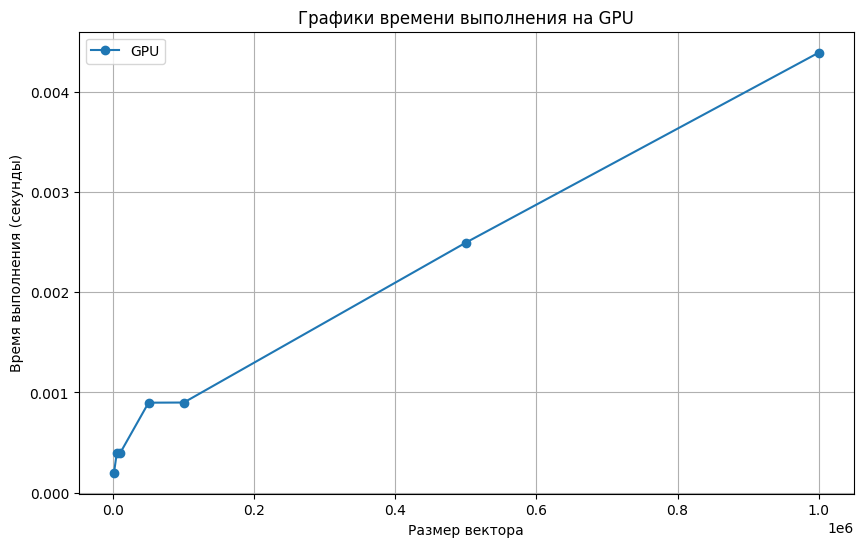

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


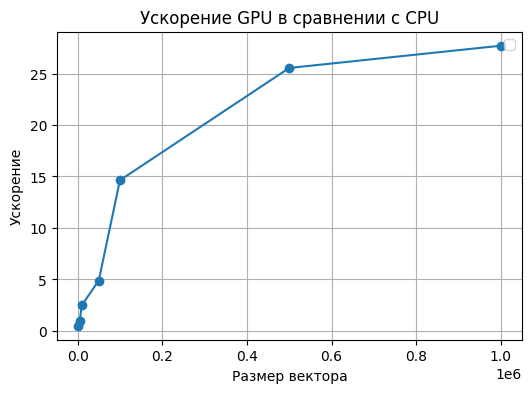

In [13]:
vec_sizes = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]  # Размеры векторов
results = []

for size in vec_sizes:
    vec = np.random.rand(size)
    res_time_cpu = 0
    res_time_gpu = 0
    
    for i in range(10):
        #Вычисления на CPU
        start_time = time.time()
        cpu_res = vecsum_cpu(vec)
        cpu_time = time.time() - start_time
        res_time_cpu += cpu_time
        
        # GPU вычисления
        start_time = time.time()
        gpu_res = vecsum_on_gpu(vec)
        gpu_time = time.time() - start_time
        res_time_gpu += gpu_time

    # Расчет ускорения
    speedup = res_time_cpu / res_time_gpu if res_time_gpu != 0 else float('inf')

    if size != 0:
        results.append({
            'Размер': size,
            'Время на CPU': res_time_cpu / 10,
            'Время на GPU': res_time_gpu / 10,
            'Ускорение': speedup
        })

res_tab = pd.DataFrame(results)
print("Результаты в зависимости от размера вектора:")
print(res_tab)

# Построение графика времени выполнения
plt.figure(figsize=(10, 6))
plt.plot(res_tab['Размер'], res_tab['Время на CPU'], label="CPU", marker='o')
plt.title("Графики времени выполнения на CPU")
plt.xlabel("Размер вектора")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(res_tab['Размер'], res_tab['Время на GPU'], label="GPU", marker='o')
plt.title("Графики времени выполнения на GPU")
plt.xlabel("Размер вектора")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.grid(True)
plt.show()

# Построение графика ускорения
plt.figure(figsize=(6, 4))
plt.plot(res_tab['Размер'], res_tab['Ускорение'], marker='o')
plt.title("Ускорение GPU в сравнении с CPU")
plt.xlabel("Размер вектора")
plt.ylabel("Ускорение")
plt.legend()
plt.grid(True)
plt.show()